In [ ]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")  
model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).to(device)
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
      .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './mlp_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')

epoch [1/100], loss:0.1959
epoch [2/100], loss:0.1673
epoch [3/100], loss:0.1626
epoch [4/100], loss:0.1627
epoch [5/100], loss:0.1604
epoch [6/100], loss:0.1473
epoch [7/100], loss:0.1522
epoch [8/100], loss:0.1453
epoch [9/100], loss:0.1525
epoch [10/100], loss:0.1362
epoch [11/100], loss:0.1446
epoch [12/100], loss:0.1253
epoch [13/100], loss:0.1524
epoch [14/100], loss:0.1409
epoch [15/100], loss:0.1435
epoch [16/100], loss:0.1336
epoch [17/100], loss:0.1458
epoch [18/100], loss:0.1223
epoch [19/100], loss:0.1293
epoch [20/100], loss:0.1335
epoch [21/100], loss:0.1316
epoch [22/100], loss:0.1288
epoch [23/100], loss:0.1312
epoch [24/100], loss:0.1433
epoch [25/100], loss:0.1331
epoch [26/100], loss:0.1362
epoch [27/100], loss:0.1250
epoch [28/100], loss:0.1317
epoch [29/100], loss:0.1215
epoch [30/100], loss:0.1383
epoch [31/100], loss:0.1193
epoch [32/100], loss:0.1334
epoch [33/100], loss:0.1236
epoch [34/100], loss:0.1220
epoch [35/100], loss:0.1336
epoch [36/100], loss:0.1217
e

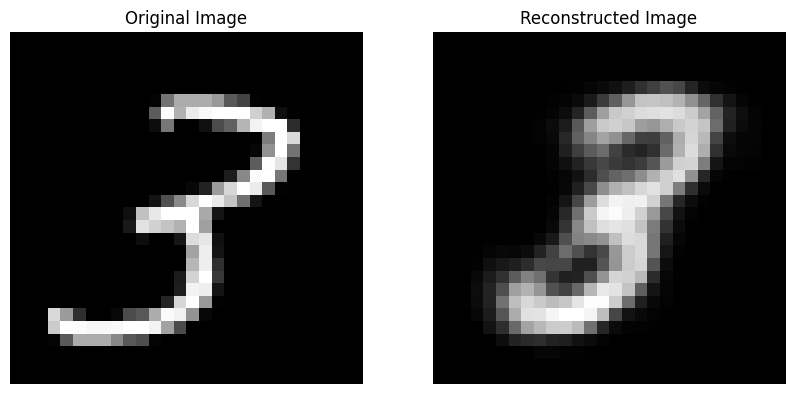

In [11]:
# Set the device to CPU explicitly
device = torch.device('cpu')

# Ensure the model is on CPU
model.to(device)

# Flatten the images to feed into the autoencoder
images_flattened = images.view(images.size(0), -1).to(device)  # Move data to CPU

# Model evaluation
model.eval()  
with torch.no_grad():  
    reconstructed_images = model(images_flattened)

# Reshaping the reconstructed images back to 28x28
reconstructed_images = reconstructed_images.view(reconstructed_images.size(0), 1, 28, 28)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(images[0].squeeze(), cmap='gray')  # No need for .cpu() if it's already on CPU
axes[0].set_title("Original Image")
axes[0].axis('off')

# Reconstructed image
axes[1].imshow(reconstructed_images[0].squeeze(), cmap='gray')  # No need for .cpu() if it's already on CPU
axes[1].set_title("Reconstructed Image")
axes[1].axis('off')

plt.show()